# **Introduction:**

This file serves to design and test a custom implementation of an Adaptive Neuro-Fuzzy Inference System (ANFIS). This will be trained and evaluated against the ANN designed previously. 

This ANFIS takes the load history, the distance to the task, and the total distance travelled thus far and performs inference about the suitability of a given robot for a task at hand. 

**Date Created:** 13/01/2025

**Date Modified:** 14/01/2025

# **Import Packages:** 

This section imports all the necessary packages for the ANFIS implementation. 

In [72]:
# import packages:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# from tensorflow.keras import layers, Sequential
# from tensorflow.keras.optimizers import Adam

# **Layer Function & Class Definitions:**

Need to define the membership function to be used first:

In [73]:
# triangular membership function:
def triangular_mf(x, params):
    a, b, c = params

    if x <= a or x >= c:
        return 0
    elif a < x < b:
        return (x - a) / (b - a)
    elif b < x < c:
        return (c - x) / (c - b)
    elif x == b:
        return 1
    elif x == c:
        return 1

Now need to define the ANFIS class:

In [74]:
class ANFIS:
    # object constructor:
    def __init__(self, num_inputs, num_mfs, num_rules, params = None):
        # need to instantiate the object:
        self.num_inputs = num_inputs
        self.num_mfs = num_mfs
        self.num_rules = num_rules
        self.memberships = {}

        # must first assign the antecedent parameters:
        # if custom:
        if params is not None:
            for j in range(self.num_inputs):
                for i in range(self.num_mfs):
                    self.memberships[f'membership_{j+1}_{i+1}'] = params[j, i, :]
            print('params set to other than None')
        # if not custom, randomly initialize them:
        else:
            for j in range(self.num_inputs):
                for i in range(self.num_mfs):
                    a = np.random.uniform(low = -1.0, high = 1.0)
                    b = np.random.uniform(low = -1.0, high = 1.0)
                    c = np.random.uniform(low = -1.0, high = 1.0)

                    params = np.array([a, b, c])
                    self.memberships[f'membership_{j+1}_{i+1}'] = params

        print('model created!')

    # this is a plotting function to verify that the membership functions are correct:

    def plot_membership_functions(self, max_values):
        x1_max, x2_max, x3_max = max_values

        input_ranges = {
            0: np.linspace(0, x1_max, 1000),
            1: np.linspace(0, x2_max, 1000), 
            2: np.linspace(0, x3_max, 1000),
        }

        label_values = {
            0: 'Low',
            1: 'Medium',
            2: 'High'
        }

        # plot mfs for each input:
        for input_index in range(self.num_inputs):
            x_values = input_ranges[input_index]
            plt.figure(figsize=(12, 8))

            # plot each mfs for the selected input:
            for i in range(self.num_mfs):
                params = self.memberships[f'membership_{input_index+1}_{i+1}']
                y_values = [triangular_mf(x, params) for x in x_values]
                plt.plot(x_values, y_values, label = f'{label_values[i]}')
        
                plt.title(f'Membership Functions for Input {input_index + 1}')
                plt.xlabel('Input Value')
                plt.ylabel('Degree of Membership')
                plt.legend()
                plt.grid(True)
        plt.show()



Test the class:

params set to other than None
model created!


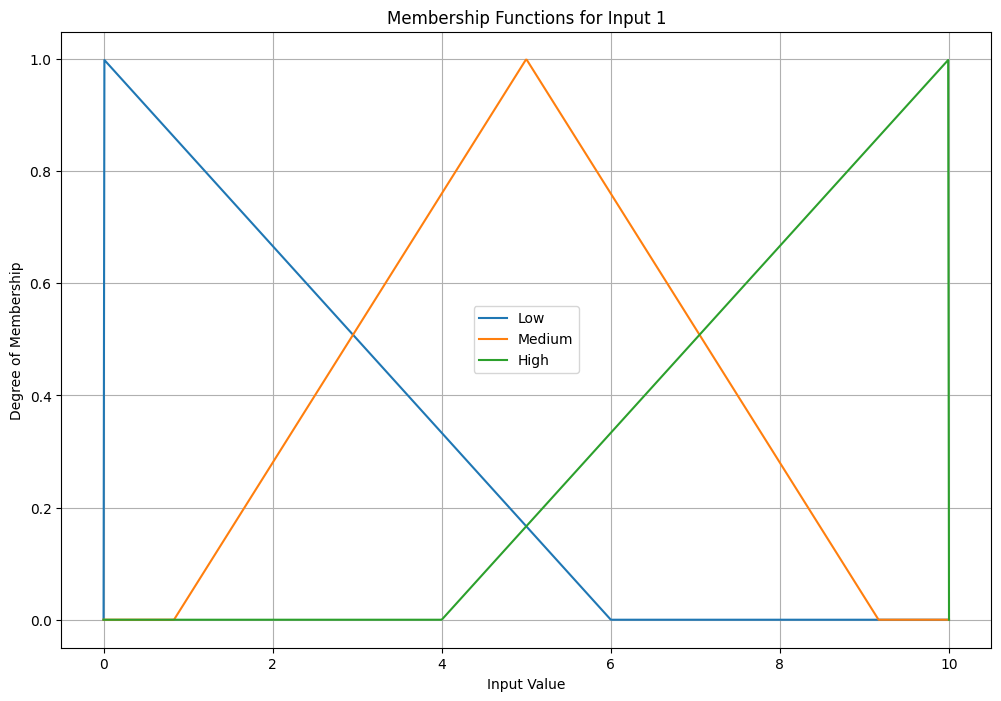

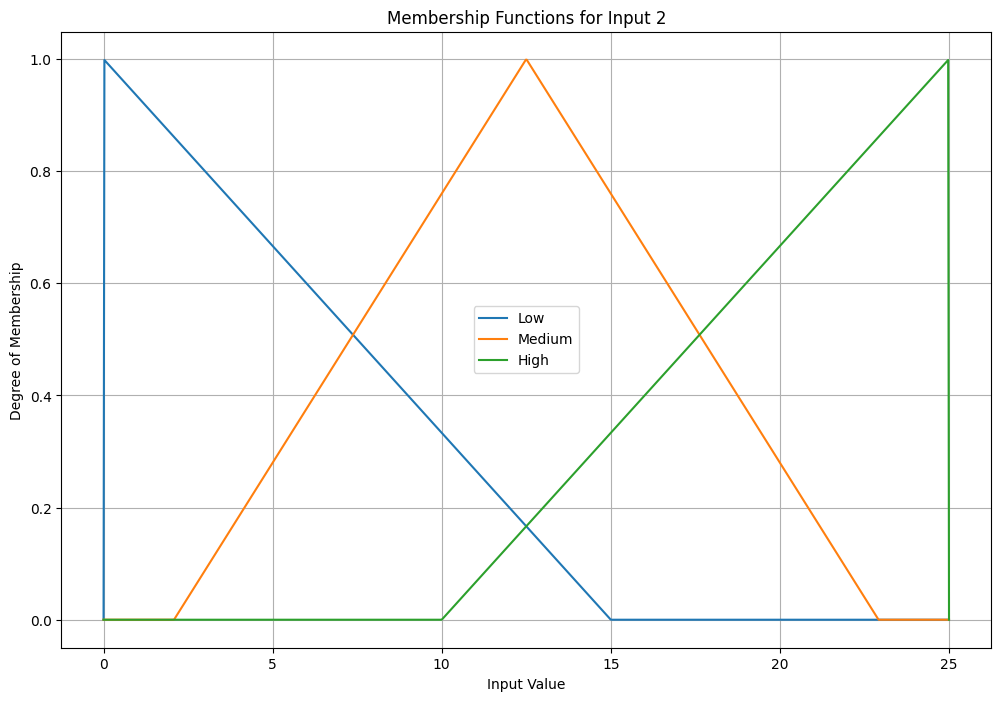

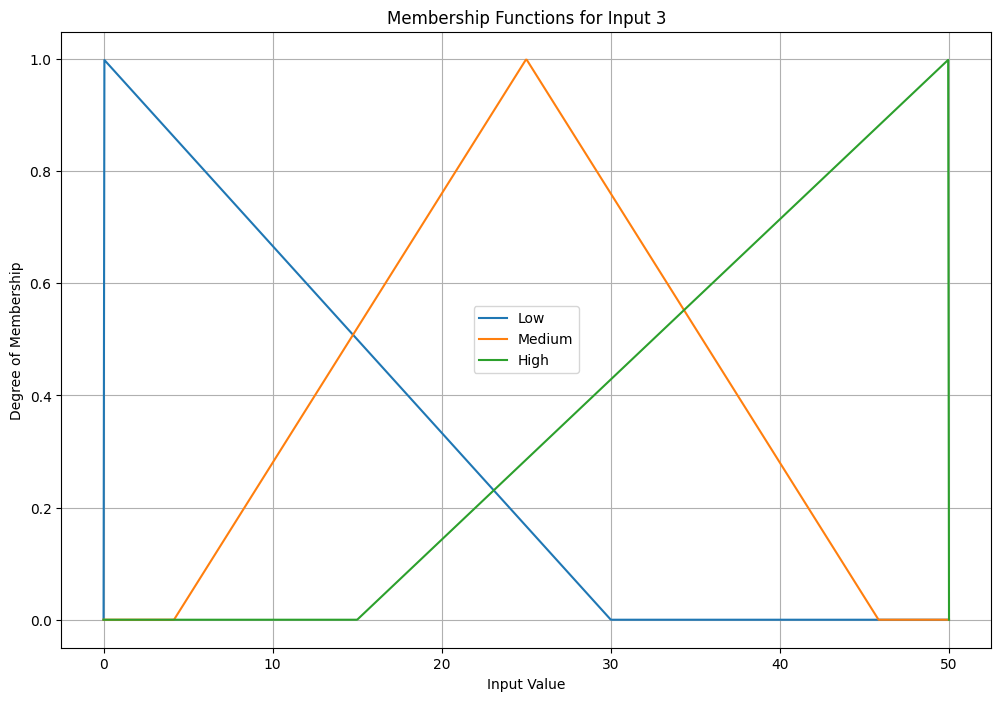

In [75]:
params = np.array([
    [  # Parameters for input 1
        [0, 0, 6],
        [5/6, 5, 55/6],
        [4, 10, 10]
    ],
    [  # Parameters for input 2
        [0, 0 , 15],
        [25/12, 12.5, 275/12],
        [10, 25, 25]
    ],
    [  # Parameters for input 3
        [0, 0, 30],
        [25/6, 25, 275/6],
        [15, 50, 50]
    ]
])

inputs = np.array([2, 12, 21])
max_values = np.array([10, 25, 50])

test = ANFIS(num_inputs = 3, num_mfs = 3, num_rules = 2, params = params)
test.plot_membership_functions(max_values)